<a href="https://colab.research.google.com/github/CoderZIE/ApproximateMultiplier/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import torch
import torch.nn
import torchvision.models as models
import torch.quantization
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from torchsummary import summary
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
# Load a ResNet-50 model with "IMAGENET1K_V2" weights
model = resnet50(weights="IMAGENET1K_V2")

# Access the model's state_dict
state_dict = model.state_dict()

# Define a list of convolution layer names you want to extract weights from
conv_layer_names = ['conv1', 'layer1.0.conv1', 'layer4.2.conv3']

# Create a dictionary to store the weights of the selected layers
selected_weights = {}

# Extract and store the weights of the specified convolution layers
for layer_name in conv_layer_names:
    selected_weights[layer_name] = state_dict[layer_name + '.weight']

# Flatten and store the weights in different variables
weights1 = selected_weights['conv1'].view(-1)
weights2 = selected_weights['layer1.0.conv1'].view(-1)
weights3 = selected_weights['layer4.2.conv3'].view(-1)

In [ ]:
# Load a pretrained ResNet model
resnet = ResNet50(weights='imagenet', include_top=True)

# Create a model with only the convolutional and activation layers
convolutional_layers = []
activation_layers = []

for layer in resnet.layers:
    layer_name = layer.name.lower()
    layer_type = type(layer).__name__

    if 'conv' in layer_name and layer_type == 'Conv2D':
        convolutional_layers.append(layer)
    elif 'relu' in layer_name and layer_type == 'Activation':
        activation_layers.append(layer)

# Print the convolutional and activation layers
print("Convolutional Layers:")
for layer in convolutional_layers:
    print(layer.name, type(layer).__name__)

print("\nActivation Layers:")
for layer in activation_layers:
    print(layer.name, type(layer).__name__)

Convolutional Layers:
conv1_conv Conv2D
conv2_block1_1_conv Conv2D
conv2_block1_2_conv Conv2D
conv2_block1_0_conv Conv2D
conv2_block1_3_conv Conv2D
conv2_block2_1_conv Conv2D
conv2_block2_2_conv Conv2D
conv2_block2_3_conv Conv2D
conv2_block3_1_conv Conv2D
conv2_block3_2_conv Conv2D
conv2_block3_3_conv Conv2D
conv3_block1_1_conv Conv2D
conv3_block1_2_conv Conv2D
conv3_block1_0_conv Conv2D
conv3_block1_3_conv Conv2D
conv3_block2_1_conv Conv2D
conv3_block2_2_conv Conv2D
conv3_block2_3_conv Conv2D
conv3_block3_1_conv Conv2D
conv3_block3_2_conv Conv2D
conv3_block3_3_conv Conv2D
conv3_block4_1_conv Conv2D
conv3_block4_2_conv Conv2D
conv3_block4_3_conv Conv2D
conv4_block1_1_conv Conv2D
conv4_block1_2_conv Conv2D
conv4_block1_0_conv Conv2D
conv4_block1_3_conv Conv2D
conv4_block2_1_conv Conv2D
conv4_block2_2_conv Conv2D
conv4_block2_3_conv Conv2D
conv4_block3_1_conv Conv2D
conv4_block3_2_conv Conv2D
conv4_block3_3_conv Conv2D
conv4_block4_1_conv Conv2D
conv4_block4_2_conv Conv2D
conv4_block4_3_

In [ ]:




# Flatten the weights
#flattened_weights = first_layer_weights.flatten()

flattened_weights = conv1_weights.flatten()


print(flattened_weights)

tensor([ 0.0133,  0.0147, -0.0154,  ..., -0.1135,  0.0676, -0.0068],
       grad_fn=<ViewBackward0>)


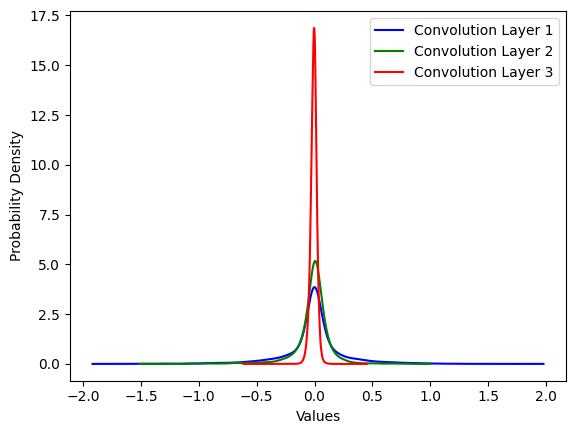

In [ ]:


# Create a list of your 8 arrays of values (replace these with your actual data)
arrays_of_values = [weights1,weights2,weights3]

# Create a list of different colors for the lines
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

# Create a figure and axis
fig, ax = plt.subplots()

for i, values in enumerate(arrays_of_values):
    # Calculate the probability density function using a kernel density estimate (KDE)
    kde = gaussian_kde(values)
    x = np.linspace(min(values), max(values), 1000)
    y = kde(x)

    # Plot each line with a different color
    ax.plot(x, y, label=f'Convolution Layer {i+1}', color=colors[i])

# Label the axes
ax.set_xlabel("Values")
ax.set_ylabel("Probability Density")

# Set the y-axis limits
#ax.set_ylim(0, 0.5)  # Adjust the values as needed

# Show a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
#Quantizing the weights to 8 bits

# Assuming 'flattened_weights' is a NumPy array
flattened_weights_np = weights1

# Convert the NumPy array to a PyTorch tensor
flattened_weights_tensor = torch.tensor(flattened_weights_np, dtype=torch.float32)

# Quantize the weights to 8 bits
quantized_weights1 = torch.quantize_per_tensor(flattened_weights_tensor, scale=0.0001, zero_point=0, dtype=torch.qint8)

# Assuming 'flattened_weights' is a NumPy array
flattened_weights_np = weights2

# Convert the NumPy array to a PyTorch tensor
flattened_weights_tensor = torch.tensor(flattened_weights_np, dtype=torch.float32)

# Quantize the weights to 8 bits
quantized_weights2 = torch.quantize_per_tensor(flattened_weights_tensor, scale=0.0001, zero_point=0, dtype=torch.qint8)

# Assuming 'flattened_weights' is a NumPy array
flattened_weights_np = weights3

# Convert the NumPy array to a PyTorch tensor
flattened_weights_tensor = torch.tensor(flattened_weights_np, dtype=torch.float32)

# Quantize the weights to 8 bits
quantized_weights3 = torch.quantize_per_tensor(flattened_weights_tensor, scale=0.0001, zero_point=0, dtype=torch.qint8)




<ipython-input-37-857da8ac1e27>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flattened_weights_tensor = torch.tensor(flattened_weights_np, dtype=torch.float32)
<ipython-input-37-857da8ac1e27>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flattened_weights_tensor = torch.tensor(flattened_weights_np, dtype=torch.float32)
<ipython-input-37-857da8ac1e27>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flattened_weights_tensor = torch.tensor(flattened_weights_np, dtype=torch.float32)


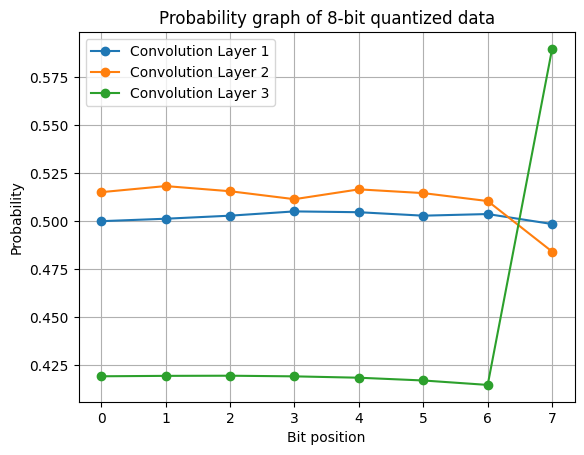

In [ ]:
#plot the graphs of weights

# Extract the values from the quantized weights

values1 = quantized_weights1.int_repr().numpy()
values1 = values1.flatten()

values2 = quantized_weights2.int_repr().numpy()
values2 = values2.flatten()

values3 = quantized_weights3.int_repr().numpy()
values3 = values3.flatten()

# values4 = quantized_weights4.int_repr().numpy()
# values4 = values4.flatten()

# values5 = quantized_weights5.int_repr().numpy()
# values5 = values5.flatten()

# values6 = quantized_weights6.int_repr().numpy()
# values6 = values6.flatten()



# values7 = quantized_weights7.int_repr().numpy()
# values7 = values7.flatten()

# values8 = quantized_weights8.int_repr().numpy()
# values8 = values8.flatten()

# Assuming you have 8 arrays named values1, values2, ..., values8
arrays = [values1,values2,values3]

# Create a list to store the probabilities for each array
all_probabilities = []

# Calculate the probabilities for each array
for values in arrays:
    probabilities = np.zeros(8)
    for i in range(8):
        probabilities[i] = np.count_nonzero((values & (1 << i)) != 0) / len(values)
    all_probabilities.append(probabilities)

# Label the chart
plt.xlabel("Bit position")
plt.ylabel("Probability")
plt.title("Probability graph of 8-bit quantized data")

# Create a plot for each array
for i, probabilities in enumerate(all_probabilities):
    label = f'Convolution Layer {i + 1}'
    plt.plot(range(8), probabilities, marker='o', linestyle='-', label=label)

plt.xticks(range(8))
plt.grid(True)
plt.legend()
plt.show()



